In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

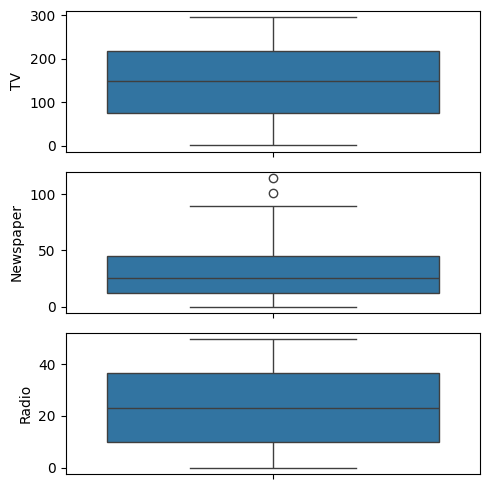

In [7]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

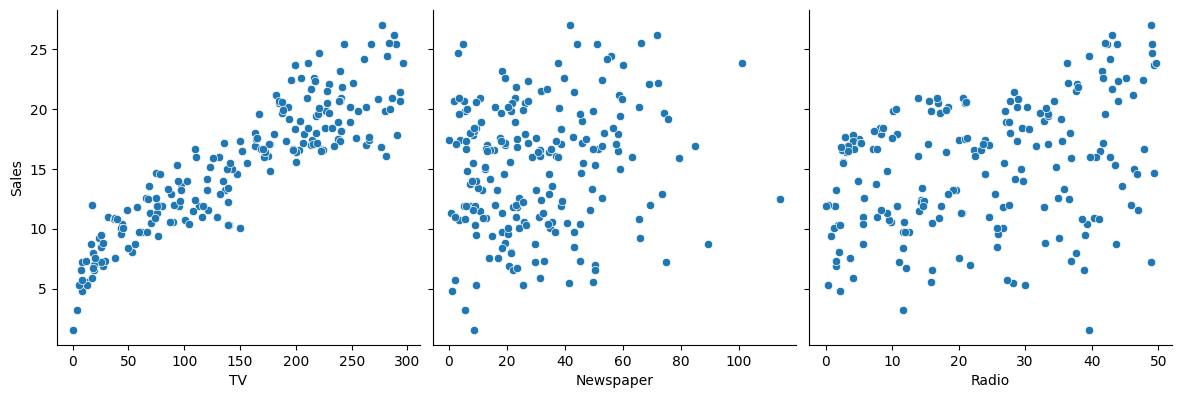

In [8]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

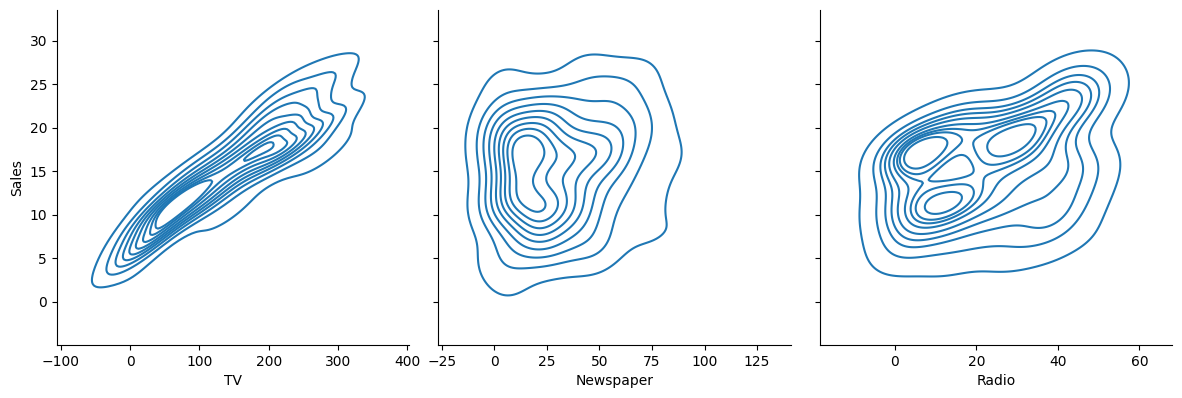

In [9]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='kde')
plt.show()

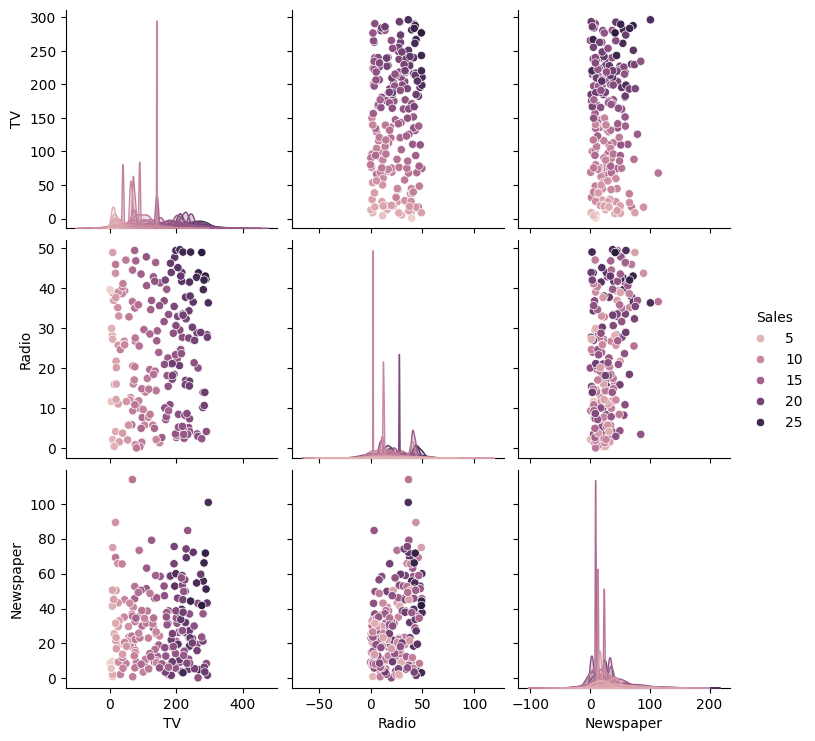

In [10]:
sns.pairplot(df, hue="Sales", diag_kind="kde")
plt.show()

In [11]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
X = df[['TV', 'Radio', 'Newspaper']]

In [13]:
y = df['Sales']

In [14]:
# Now we will try to reduce the dimensionality of the data from 3 to 1 by combining all features of X and outputting one common feature
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca_sklearn = pca.fit_transform(X)

In [15]:
X_pca_sklearn.shape

(200, 1)

In [16]:
df1 = df
df1['feature'] = np.array(X_pca_sklearn)

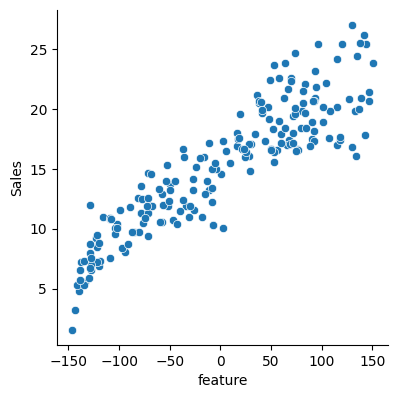

In [17]:
# Let's see how Sales are related with other variables using scatter plot.
# pd.DataFrame(list2, columns=['Column1', 'Column2'])
sns.pairplot(df1, x_vars=['feature'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [31]:
w = np.linalg.pinv(df1['feature']) @ y

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [19]:
w

array([0.06707876, 0.16003288, 0.02843349])

In [20]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [22]:
df1['feature'].shape

(200,)

In [23]:
y.shape

(200,)

In [29]:
X = df1['feature'].values.reshape(-1, 1)

In [30]:
X

array([[ 8.37885459e+01],
       [-1.02138730e+02],
       [-1.28992484e+02],
       [ 5.07097169e+00],
       [ 3.40590034e+01],
       [-1.37372550e+02],
       [-8.95411919e+01],
       [-2.71687122e+01],
       [-1.39089396e+02],
       [ 5.23964374e+01],
       [-8.12021689e+01],
       [ 6.72413078e+01],
       [-1.22554515e+02],
       [-5.00532789e+01],
       [ 5.73839300e+01],
       [ 4.89406812e+01],
       [-7.78006550e+01],
       [ 1.34889902e+02],
       [-7.80470423e+01],
       [ 8.60991305e-02],
       [ 7.17442417e+01],
       [ 9.00507477e+01],
       [-1.33597890e+02],
       [ 8.11123565e+01],
       [-8.50249744e+01],
       [ 1.15468311e+02],
       [-4.35993325e+00],
       [ 9.28571371e+01],
       [ 1.01659797e+02],
       [-7.63432223e+01],
       [ 1.46079277e+02],
       [-3.40705528e+01],
       [-5.00605361e+01],
       [ 1.18035162e+02],
       [-5.19119540e+01],
       [ 1.43098897e+02],
       [ 1.19646195e+02],
       [-7.18334307e+01],
       [-1.0

In [32]:
w = np.linalg.pinv(X) @ y

In [33]:
w

array([0.05551319])

In [34]:
b = np.mean(y) - w * np.mean(X)


In [35]:
b

array([15.1305])

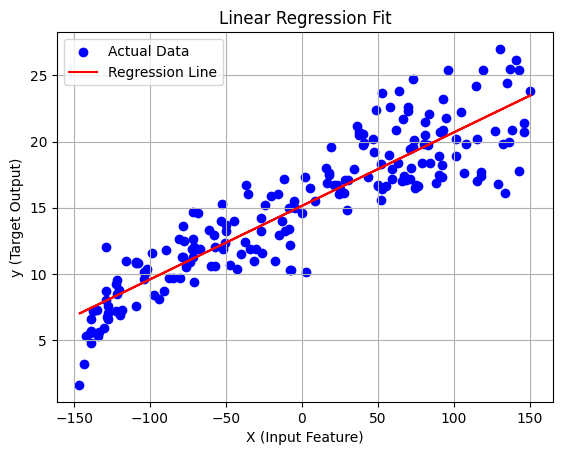

In [36]:
# Generate Predictions
y_pred = w * X + b

# Plot Original Data
plt.scatter(X, y, color='blue', label="Actual Data")

# Plot Regression Line
plt.plot(X, y_pred, color='red', label="Regression Line")

# Labels & Title
plt.xlabel("X (Input Feature)")
plt.ylabel("y (Target Output)")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)

# Show Plot
plt.show()